In [1]:

import sys
sys.path.append('../')
from Codes.model import *
from Codes.utils import *
plt.style.use('default')

from timeit import default_timer
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.datasets import make_blobs
from scipy import stats

from sklearn.metrics import silhouette_score


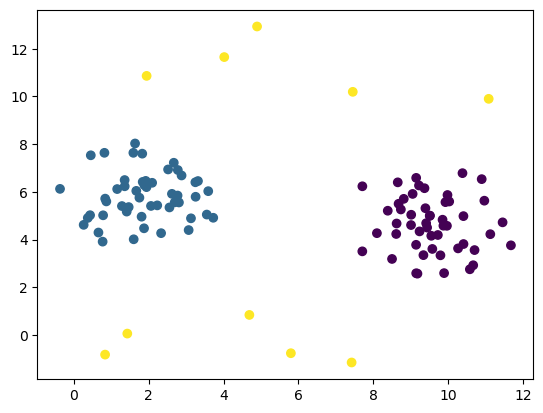

In [2]:


def BlobsWithOutliers(N,D,K,box,seed, outliers):

    generator = np.random.RandomState(seed)
    center_box = [0,box]

    centers = generator.uniform(center_box[0], center_box[1], size=(K, D))

    X, y = make_blobs(n_samples=N, centers=centers, n_features=D, cluster_std = 1,
                    random_state=seed)



    generator = np.random.RandomState(23)

    X1 = generator.uniform(low = [-1,-2], high = [10, 1 ], size = (5,2) )
    X2 = generator.uniform(low = [4,9], high = [12, 12 ], size = (2,2) )
    X3 = generator.uniform(low = [-1,10], high = [9, 13 ], size = (3,2) )


    X = np.append(X, X1,axis = 0)
    X = np.append(X, X2,axis = 0)
    X = np.append(X, X3,axis = 0)



    y = np.append(y, len(X1)*[K+1], axis = 0)
    y = np.append(y, len(X2)*[K+1], axis = 0)
    y = np.append(y, len(X3)*[K+1], axis = 0)




    cols = [ 'X' + str(i+1) for i in range(D) ]

    df_data = pd.DataFrame(np.c_[X,y], columns = ['X1','X2','y'])

    df_data = pd.DataFrame(X, columns = cols)
  

    return df_data, X,y, centers



N = 100
D = 2
K = 2
box = 10
seed = 37
outliers = 46

df_data, X,y, centers = BlobsWithOutliers(N,D,K,box,seed, outliers)

cik = np.zeros((N,K))
for i in range(N):

    cik[i,y[i]] = 1

_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()     



In [3]:
def getOutliersCnt(distM,K,cutoff):

    mad = np.zeros((1,K))
    med = np.zeros((1,K))
    mean = np.zeros((1,K))

    for k in range(K):
        dist_tmpk = [d for d in distM[:,k] if d > 0 ]
        med[0,k] = np.median(dist_tmpk)
        mean[0,k] = np.mean(dist_tmpk)
        mad[0,k] = stats.median_abs_deviation(dist_tmpk)
    print('Median: ', med)
    print('MAD: ', mad)
    print('Mean: ', mean)
    sigmaK = 1.4826*mad  
    # thres = med + 3*sigmaK
    thres =  cutoff*sigmaK

    print('threshold: ', thres)
    outcnt = np.sum(distM > thres)
    
    return outcnt
        
        

In [4]:

kmplus = UnsupervisedClustering(K =K, max_iter= 1000)
kmplus.set_model(K_MeansPlus())
kmplus.fit(df_data )   
 
print(kmplus.evaluate(y))
centers = kmplus.cluster_centers

[0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]


In [5]:
distM, _ = getDistAssignMat(X, centers)
getOutliersCnt(distM,K,10)


Median:  [[1.79524105 1.68906468]]
MAD:  [[0.7726906  0.81182429]]
Mean:  [[2.24807314 2.0968174 ]]
threshold:  [[11.45591081 12.03610696]]


0

MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  7.70835885185554
E:  7.822153349858158
Optimal solution reached with Cost:  7.822153349858158


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.6727272727272727, 0.5914929107589658, 0.19329487289731592, 0.16430834009246365, 0.15416019676129172, 0.13929966096191349]
optimal value:  7.822153349858158
[[4.18056973 3.42985326]
 [7.35956288 8.4537682 ]]


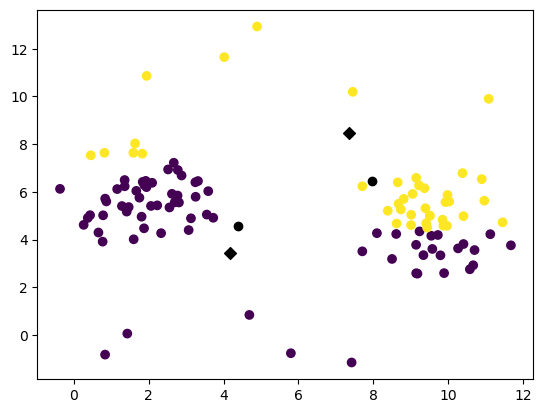

MinMax model 2
# of outliers:  2
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  7.124515566485954
E:  7.341731050807764
Optimal solution reached with Cost:  7.341731050807764


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.6181818181818182, 0.5494578815679733, 0.0977299340619662, 0.07426877088043396, 0.06341124358323659, 0.06464386938395228]
optimal value:  7.341731050807764
[[5.76418218 7.33880981]
 [5.76518218 3.06671412]]


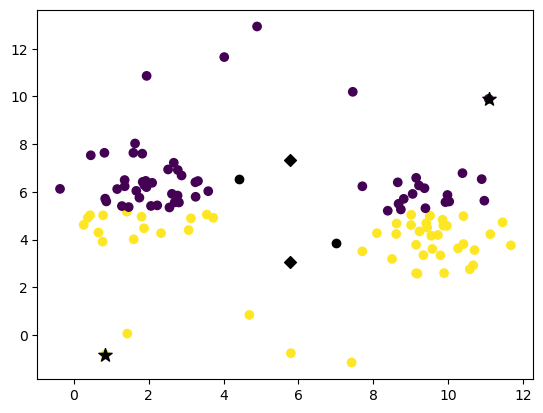

MinMax model 4
# of outliers:  4
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  6.305899217038776
Optimal solution reached with Cost:  6.305899217038776


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  6.305899217038776
[[2.66337556 3.65838229]
 [7.45093822 3.8893271 ]]


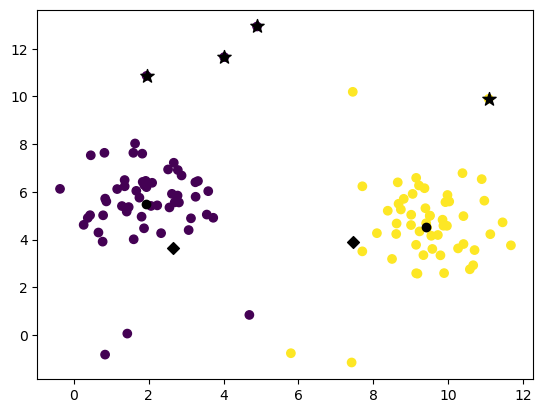

MinMax model 6
# of outliers:  6
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  5.329125577054982
Optimal solution reached with Cost:  5.329125577054982


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9124270225187656, 0.8245842593302168, 0.774159579579219, 0.771512178569498, 0.6741057900482117]
optimal value:  5.329125577054982
[[0.83853123 4.50294062]
 [9.41017267 6.82533519]]


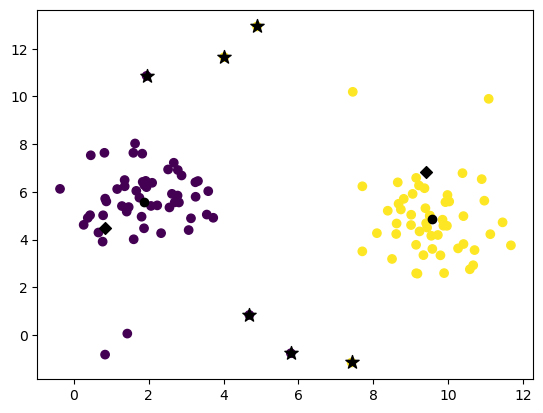

MinMax model 8
# of outliers:  8
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  4.826477566424776
E:  4.884094225670435
Optimal solution reached with Cost:  4.884094225670435


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9130942452043369, 0.8259597540341668, 0.7828551220134495, 0.7803083175349749, 0.681400589427659]
optimal value:  4.884094225670435
[[ 1.431499    4.29611605]
 [10.20480327  5.89191188]]


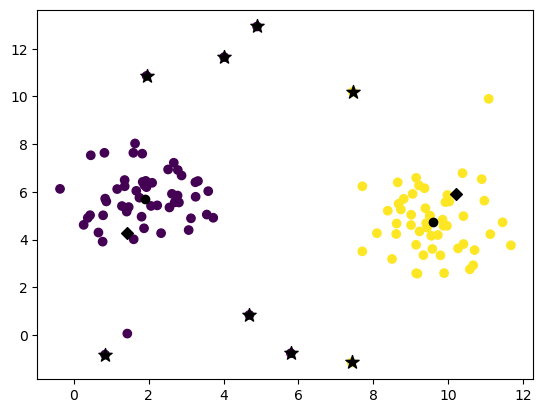

MinMax model 10
# of outliers:  10
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  3.220939127729147
Optimal solution reached with Cost:  3.220939127729147


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  3.220939127729147
[[1.431499   5.28821918]
 [9.50544172 4.81241779]]


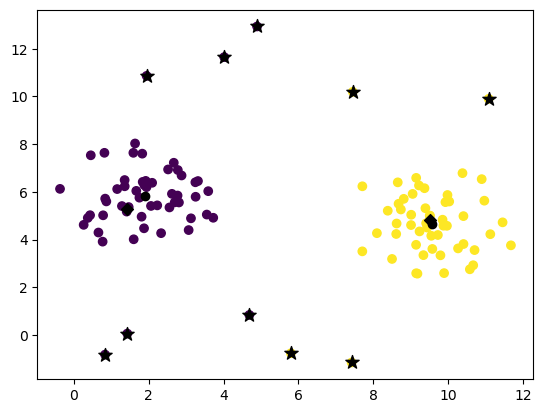

MinMax model 12
# of outliers:  12
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  2.944515453148585
Optimal solution reached with Cost:  2.944515453148585


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  2.944515453148585
[[1.49766159 5.63080545]
 [9.72620529 4.75675769]]


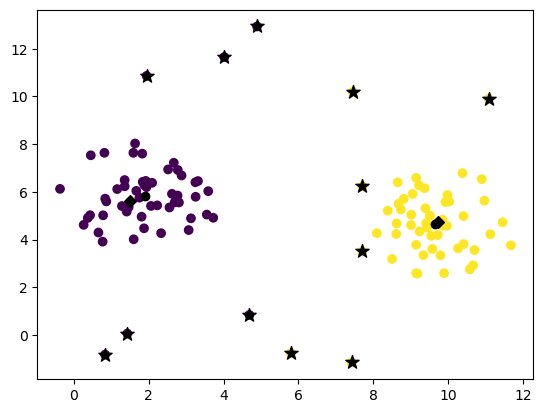

MinMax model 14
# of outliers:  14
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  2.8310425108330435
E:  2.831042510833043
E:  2.8310425108330426
Optimal solution reached with Cost:  2.8310425108330426


# of constraints added:  42
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  2.8310425108330426
[[1.53802622 5.52444056]
 [9.76946784 4.68654729]]


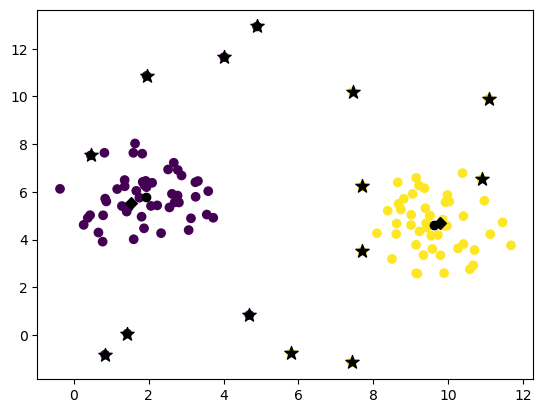

MinMax model 16
# of outliers:  16
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  2.4722169394150626
E:  2.651078050405357
E:  2.678850671042481
E:  2.6908312161282795
E:  2.690831216128279
Optimal solution reached with Cost:  2.690831216128279


# of constraints added:  46
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  2.690831216128279
[[1.66160923 5.54106885]
 [9.56329199 4.34016015]]


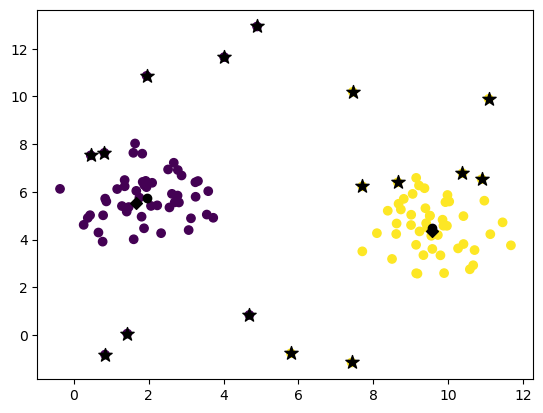

MinMax model 18
# of outliers:  18
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  1.9684353735990525
E:  2.603397056442666
E:  2.651078049310081
E:  2.6510780500402484
Optimal solution reached with Cost:  2.6510780500402484


# of constraints added:  44
Purity, RI, ARI, NMI, AMI, homogeneity_score

Mean along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  2.6510780500402484
[[1.7013624  5.54106885]
 [9.36494453 4.15760477]]


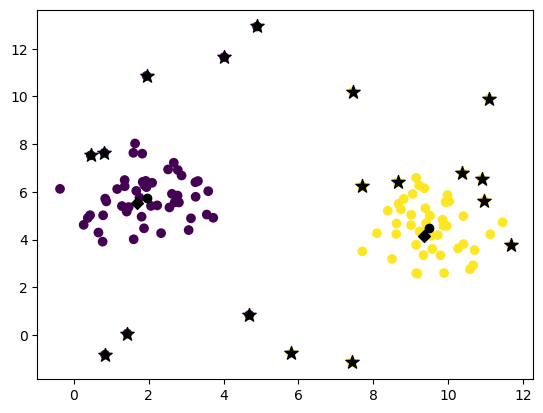

In [6]:
sil_list_io = []
sil_list_eo = []

cmodel_sse_list_io = []
cmodel_sse_list_eo = []

ci_sse_list = []
ce_sse_list = []

ci_sse_oe_list = []
ce_sse_oe_list = []
mmoptval_list = []
mmoptval_io_list = []

metric_result_list = []
obj_list = []
max = 20
step = 2
for i in range(0,max,step):

    mmOptOut = UnsupervisedClustering(K = K , max_iter= 25, random_state=234)
    mmOptOut.set_model(MinMax(initConstrCnt=15, optimalGap=0.05, tol=0.05, time= 1, outputFlag=False, outliersCnt=i, initConstrIntRatio=5))

    start = default_timer()
    mmOptOut.fit(df_data )

    end = default_timer()

    metric_result = mmOptOut.evaluate(y)
    metric_result_list.append(metric_result)
    
    mmoptval_list.append(mmOptOut.model_optVal)

    obj_list.append(mmOptOut)
    
    print('Purity, RI, ARI, NMI, AMI, homogeneity_score\n')
    print('Mean along all metrics: ', metric_result)
    print('optimal value: ', mmOptOut.model_optVal)
    # print('SSE at optimal: ', mmOptOut.model_inertia)

    center = mmOptOut.cluster_centers
    labels = mmOptOut.labels
    trueCik = mmOptOut.binary_assign
    trueOutIndx = mmOptOut.outliers
    distM, _ = getDistAssignMat(X, center, trueCik)

    mmoptval_io_list.append(np.max(distM))
    X = np.array(X)
    X_out = np.array([X[i,:] for i in range(len(X)) if i not in trueOutIndx])
    labels_out = np.array([labels[i] for i in range(len(X)) if i not in trueOutIndx])

    print(center)


    sil_list_io.append(silhouette_score(X,labels))

    sil_list_eo.append(silhouette_score(X_out,labels_out))

    center_io = getCentroids(X,K,trueCik)
    center_eo = getCentroids(X,K,trueCik, trueOutIndx)

    cmodel_sse_list_io.append(np.ravel(getSSE(X,center, labels )))
    cmodel_sse_list_eo.append(np.ravel(getSSE(X,center, labels , trueOutIndx)))


    ci_sse_list.append(np.ravel(getSSE(X,center_io, labels )))
    ce_sse_list.append(np.ravel(getSSE(X,center_eo, labels )))

    ci_sse_oe_list.append(np.ravel(getSSE(X,center_io, labels , trueOutIndx)))

    ce_sse_oe_list.append(np.ravel(getSSE(X,center_eo, labels , trueOutIndx)))



    _,ax = plt.subplots(1)

    plt.scatter(X[:,0], X[:,1], c = labels)
    plt.scatter(center_eo[:,0],center_eo[:,1], c= 'black')
    plt.scatter(center[:,0],center[:,1], c= 'black', marker = 'D')

    plt.scatter(X[list(flatten(trueOutIndx))][:,0], X[list(flatten(trueOutIndx))][:,1], c = 'black', marker = '*', s = 100)

    plt.show()




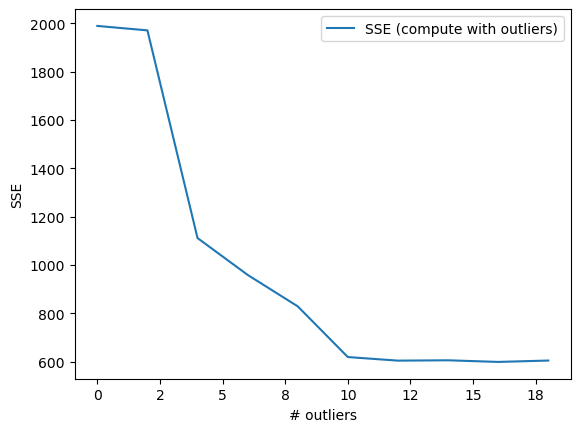

In [7]:

fig,ax =plt.subplots(1)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.plot(range(0,max,step),  cmodel_sse_list_io, label = 'SSE (compute with outliers)')


plt.ylabel('SSE')
plt.xlabel('# outliers')
plt.legend()

plt.show()

## Search for number of outliers "l"

In [8]:


def getSSEatOptimal(df_data, X, y, K, outliersCnt):
    
    mmOptOut = UnsupervisedClustering(K = K , max_iter= 25, random_state=234)
    mmOptOut.set_model(MinMax(initConstrCnt=15, optimalGap=0.05, tol=0.05, time= 1, outputFlag=False, outliersCnt=outliersCnt, initConstrIntRatio=5))

    mmOptOut.fit(df_data )

    X = np.array(X)

    metric_result = mmOptOut.evaluate(y)

    print('Purity, RI, ARI, NMI, AMI, homogeneity_score\n')
    print('Values along all metrics: ', metric_result)
    print('optimal value: ', mmOptOut.model_optVal)

    center = mmOptOut.cluster_centers
    labels = mmOptOut.labels
    trueCik = mmOptOut.binary_assign
    trueOutIndx = mmOptOut.outliers
    center_eo = getCentroids(X,K,trueCik, trueOutIndx)

    return np.ravel(getSSE(X,center, labels )),mmOptOut

In [9]:
def getElbowOutlierCnt(df_data, X, y, K, step ,tol_ratio = 0.01, start = 0, end = 20 ):

    u = start
    alpha = step
    f_list = []
    u_list = []
    v = u + alpha
    slope = 0.0
    prev_slope = 0.0
    counter = 0
    l = 0
    obj_list_out = []
    while v <= end:

        if counter == 0:
            f_u,mmOptOut = getSSEatOptimal(df_data, X, y, K, u) 
            f_list.append(f_u)
            u_list.append(u)
            obj_list_out.append(mmOptOut)


        f_v, mmOptOut= getSSEatOptimal(df_data, X, y, K, v)
        obj_list_out.append(mmOptOut)


        f_list.append(f_v)
        u_list.append(v)
        print('u,v', u , v)
        # print('f_u, f_v', f_u, f_v)

        slope_u_v = (f_u - f_v)/(u-v)

        print('u-v', slope_u_v)

        slope =  slope_u_v

        # if counter == 0:

        tol = abs( tol_ratio*prev_slope)
        print('tol: ', tol)
        

        print('prev_slope, new_slope' , prev_slope, slope)
        
        plt.plot(u_list,f_list)
        plt.show()

        if slope < tol and slope > -tol:
            l = u
            print("Stop search; l value: ", l)
            break
        elif slope < tol:
            print('Continue search')
            u = v
            f_u = f_v
            v = u + alpha
        elif slope > tol:

            print('Positive slope; check future')

            w = v + alpha

            f_w,mmOptOut= getSSEatOptimal(df_data, X, y, K, w) 
            print('f_w ', f_w)
            slope_v_w = (f_v - f_w)/(v-w)
            slope  = slope_v_w

            obj_list_out.append(mmOptOut)
            f_list.append(f_w)
            u_list.append(w)

            print('slope vw: ', slope_v_w)

            if slope_v_w < tol and slope_v_w > -tol:
                l = v
                print('Stop search, l value: ', l )
                break
            elif slope_v_w > tol:
                l = v
                print('Stop searching, l value: ', u , ' or ', l )
                break
            else:
                print('local increase, Continue searching or use prev local minima')
                l = u
                
                u = w
                v = u + alpha

                f_u = f_w   

        prev_slope = slope

        counter+=1        

    return l,obj_list_out,u_list,f_list

MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  7.70835885185554
E:  7.822153349858158
Optimal solution reached with Cost:  7.822153349858158


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.6727272727272727, 0.5914929107589658, 0.19329487289731592, 0.16430834009246365, 0.15416019676129172, 0.13929966096191349]
optimal value:  7.822153349858158
MinMax model 2
# of outliers:  2
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  7.124515566485954
E:  7.341731050807764
Optimal solution reached with Cost:  7.341731050807764


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.6181818181818182, 0.5494578815679733, 0.0977299340619662, 0.07426877088043396, 0.06341124358323659, 0.06464386938395228]
optimal value:  7.341731050807764
u,v 0 2
u-v [-9.20995869]
tol:  0.0
prev_slope, new_slope 0.0 [-9.209958

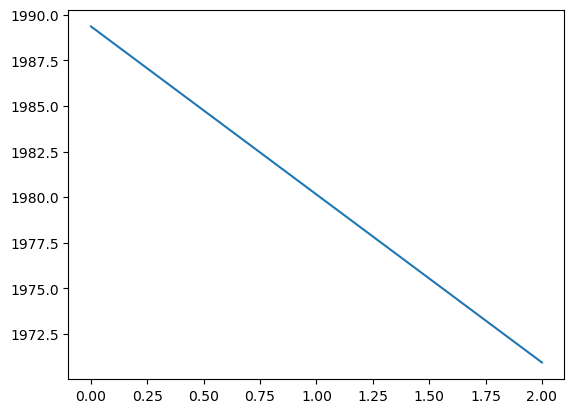

Continue search
MinMax model 4
# of outliers:  4
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  6.305899217038776
Optimal solution reached with Cost:  6.305899217038776


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  6.305899217038776
u,v 2 4
u-v [-429.90949892]
tol:  [0.7367967]
prev_slope, new_slope [-9.20995869] [-429.90949892]


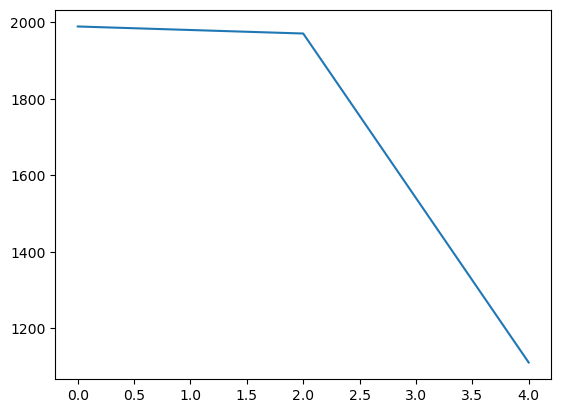

Continue search
MinMax model 6
# of outliers:  6
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  5.329125577054982
Optimal solution reached with Cost:  5.329125577054982


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.9090909090909091, 0.9124270225187656, 0.8245842593302168, 0.774159579579219, 0.771512178569498, 0.6741057900482117]
optimal value:  5.329125577054982
u,v 4 6
u-v [-76.18954861]
tol:  [34.39275991]
prev_slope, new_slope [-429.90949892] [-76.18954861]


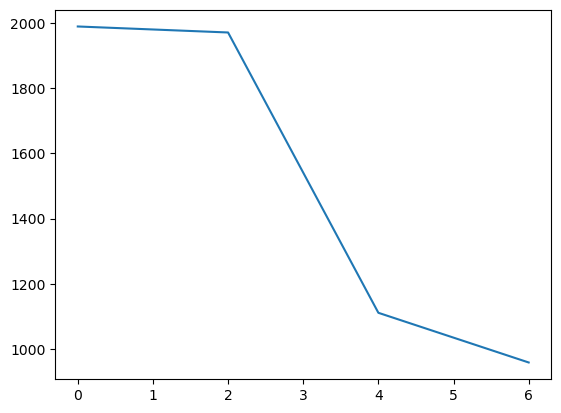

Continue search
MinMax model 8
# of outliers:  8
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  4.826477566424776
E:  4.884094225670435
Optimal solution reached with Cost:  4.884094225670435


# of constraints added:  37
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.9090909090909091, 0.9130942452043369, 0.8259597540341668, 0.7828551220134495, 0.7803083175349749, 0.681400589427659]
optimal value:  4.884094225670435
u,v 6 8
u-v [-65.15163332]
tol:  [6.09516389]
prev_slope, new_slope [-76.18954861] [-65.15163332]


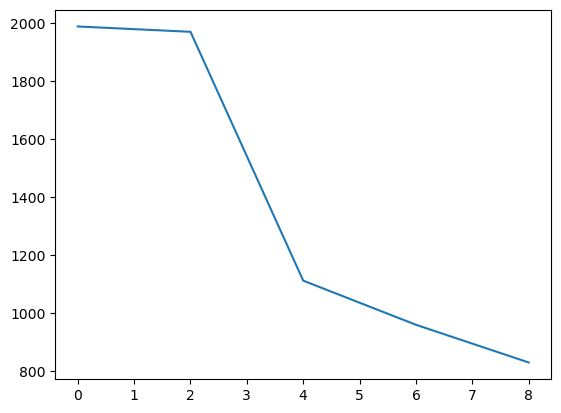

Continue search
MinMax model 10
# of outliers:  10
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  3.220939127729147
Optimal solution reached with Cost:  3.220939127729147


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  3.220939127729147
u,v 8 10
u-v [-104.9789605]
tol:  [5.21213067]
prev_slope, new_slope [-65.15163332] [-104.9789605]


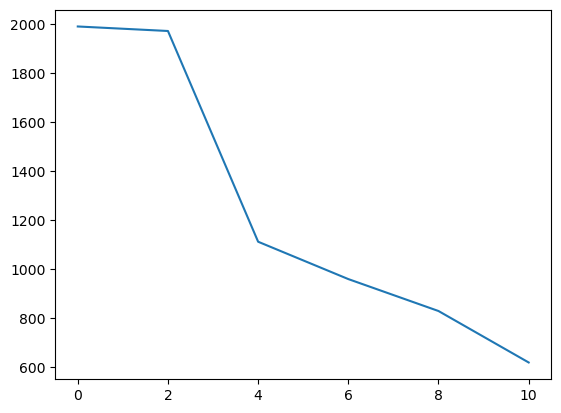

Continue search
MinMax model 12
# of outliers:  12
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
E:  2.944515453148585
Optimal solution reached with Cost:  2.944515453148585


# of constraints added:  36
Purity, RI, ARI, NMI, AMI, homogeneity_score

Values along all metrics:  [0.9090909090909091, 0.9125938281901584, 0.8249281907867971, 0.7762842112889266, 0.7736613721951812, 0.6758871940829876]
optimal value:  2.944515453148585
u,v 10 12
u-v [-7.40709734]
tol:  [8.39831684]
prev_slope, new_slope [-104.9789605] [-7.40709734]


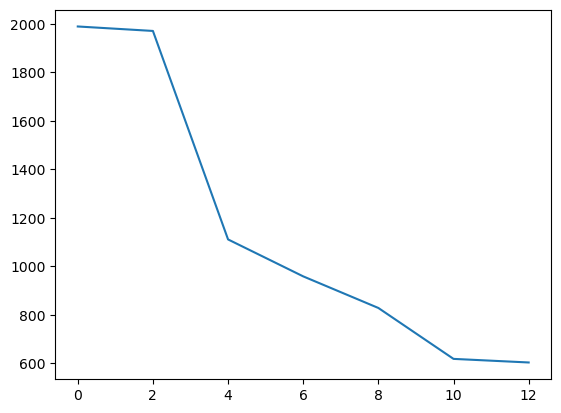

Stop search; l value:  10


In [10]:
step = 2
start = 0
end = 20
outliersCnt,obj_list_out,u_list,f_list = getElbowOutlierCnt(df_data, X, y, K, step = step, tol_ratio = 0.08, start = start, end = end )


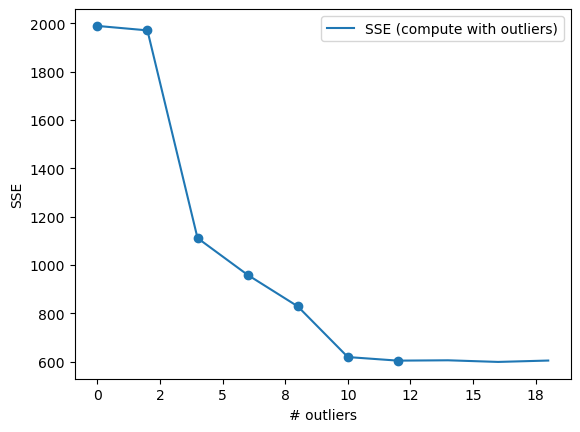

In [11]:

fig,ax =plt.subplots(1)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.plot(range(0,20,2),  cmodel_sse_list_io, label = 'SSE (compute with outliers)')
ax.scatter(u_list,f_list)


plt.ylabel('SSE')
plt.xlabel('# outliers')
plt.legend()

plt.show()

## Plot for the paper

In [12]:
colors = {0:'C0', 1:'tab:green', 2:'tab:blue', 3:'tab:orange'}


col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "D",  "^", "s"]

In [13]:
df = pd.DataFrame(np.c_[X,y], columns = ['X1','X2','y'])


In [14]:
plt.rcParams.update({'font.size': 18})


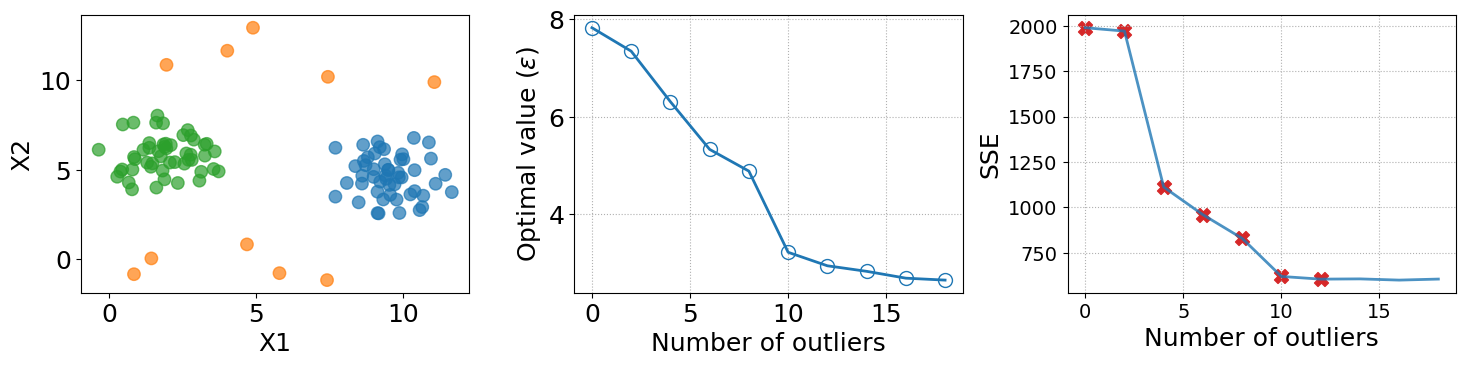

In [16]:
RESULT_DIR = "../../ExptsPaper"

fig, ax = plt.subplots(1, 3, figsize = (15,4))

ax[2].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax[2].plot(range(0,20,2),  cmodel_sse_list_io, alpha = 0.8, linewidth = 2)
ax[2].scatter(u_list,f_list, marker= 'X', s = 100,c = col[3])
ax[2].grid(True,linestyle = ':')

ax[2].set_xlabel('Number of outliers')
ax[2].set_ylabel('SSE') 
ax[2].tick_params(axis='both', which='major', labelsize=14)   


ax[0].scatter(X[:,0], X[:,1], c = df.y.map(colors), alpha = 0.7, s = 80)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')  


ax[1].plot(range(0,20,2),np.ravel(mmoptval_list), marker = 'o',fillstyle = 'none',ms = 10, linewidth = 2)


ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax[1].set_ylabel('Optimal value ('+r'$\varepsilon$'+')')
ax[1].set_xlabel('Number of outliers')

ax[1].grid(True,linestyle = ':')


fig.tight_layout()

plt.subplots_adjust(wspace=0.27)

plt.savefig(f'{RESULT_DIR}/Outlier_example.pdf', bbox_inches = 'tight')
# plt.rcParams.update({'font.size': 22})

plt.show()